# Solución a la tarea 9

Aquí vamos a implementar lo que les platiqué en el notebook de ayuda. El siguiente bloque manda a llamar a las librerías Pkg y Plots; una es para poder instalar librerías y Plots es para graficar dentro del notebook en el que estamos programando. Así, no tenemos que crear un archivo para graficar. **No era necesario que ustedes graficaran, sólo se los muestro en el notebook para que se animen a explorar qué pueden hacer con Julia por su cuenta.** 

In [ ]:
using Pkg # llamamos a la librería para instalar librerías
Pkg.add("Plots") # instalamos la librería que nos permite graficar
using Plots # llamamos a la librería recién instalada
#Este bloque de código tarda en compilar, denle un poco de tiempo. Sabrán que terminó cuando aparezca
#un número entre corchetes en lugar de un asterisco a la izquierda del bloque 
#i. e. [*] compilando
#i.e. [2] terminó

Ahora, vamos a poner el programa tal cual como lo pedía en la tarea. Tendrán los puntos completos de la tarea si su programa imprime en pantalla los valores de la posición $(x(t),y(t))$ y la velocidad $(v_x(t),v_y(t))$.

In [29]:
g=-9.81 #aceleración de la gravedad; como es un vector, hay que ponerle un signo menos
t=0 #vamos a simular el movimiento del proyectil a partir de un tiempo cero
y=0 #altura de nuestro proyectil en el tiempo cero
x=0 #posición horizontal de nuestro proyectil al tiempo cero
v_x0=10*cos(pi/4) #velocidad inicial en x; 10 es la rapidez inicial y pi/4 es el ángulo 
v_y0=10*sin(pi/4) #velocidad inicial en y
v_x=v_x0
v_y=v_y0
println("   tiempo  |","Posiciones   |  Velocidades") # esta línea no es necesaria. es para el formato
while y>=0
    println(" t = ",round(t,digits=3), "  (", round(x,digits=3),",",round(y,digits=3),")",
    "    (", round(v_x,digits=3),",",round(v_y,digits=3),")") #esta línea se ve fea pero es para darle formato
    v_x=v_x0 #porque en el tiro parabólico la velocidad en x es siempre constante
    v_y=v_y0+(g*t) #velocidad en una caída libre
    x=(v_x0*t) #la ecuación de movimiento en x se las puse en el notebook de ayuda
    y=(v_y0*t)+(0.5*g*(t*t)) #la ecuación de movimiento en y también
    t=t+0.01 #para simular el paso del tiempo
    
end

   tiempo  |Posiciones   |  Velocidades
 t = 0.0  (0.0,0.0)    (7.071,7.071)
 t = 0.01  (0.0,0.0)    (7.071,7.071)
 t = 0.02  (0.071,0.07)    (7.071,6.973)
 t = 0.03  (0.141,0.139)    (7.071,6.875)
 t = 0.04  (0.212,0.208)    (7.071,6.777)
 t = 0.05  (0.283,0.275)    (7.071,6.679)
 t = 0.06  (0.354,0.341)    (7.071,6.581)
 t = 0.07  (0.424,0.407)    (7.071,6.482)
 t = 0.08  (0.495,0.471)    (7.071,6.384)
 t = 0.09  (0.566,0.534)    (7.071,6.286)
 t = 0.1  (0.636,0.597)    (7.071,6.188)
 t = 0.11  (0.707,0.658)    (7.071,6.09)
 t = 0.12  (0.778,0.718)    (7.071,5.992)
 t = 0.13  (0.849,0.778)    (7.071,5.894)
 t = 0.14  (0.919,0.836)    (7.071,5.796)
 t = 0.15  (0.99,0.894)    (7.071,5.698)
 t = 0.16  (1.061,0.95)    (7.071,5.6)
 t = 0.17  (1.131,1.006)    (7.071,5.501)
 t = 0.18  (1.202,1.06)    (7.071,5.403)
 t = 0.19  (1.273,1.114)    (7.071,5.305)
 t = 0.2  (1.344,1.166)    (7.071,5.207)
 t = 0.21  (1.414,1.218)    (7.071,5.109)
 t = 0.22  (1.485,1.269)    (7.071,5.011)
 t = 0.23  (

Noten cómo con una velocidad inicial de $v_i=10 \frac{m}{s}$ a un ángulo de $\theta=\frac{\pi}{4}$ partimos del punto $(0,0)$ y llegamos al punto $(10.18,0)$. Si observan detenidamente las velocidades a los diferentes tiempos podrán notar que en $x$ la velocidad siempre fue constante con un valor de $7.07$, mientras que en $y$ sí cambió. Traten de pensar en como interpretar esto físicamente. 

Ahora les quiero enseñar un poco las gráficas que podemos obtener con nuestros datos. Lo de abajo no tienen que entenderlo al $100%$, sólo quiero que lo vean para que se den una idea de cómo graficar en julia sin tener que generar un archivo. 

In [2]:
function tiro_parabolico(angulo,rapidez_inicial) #así se definen las funciones en julia
    A=[]#es el mismo código de arriba, sólo que aquí guardo los datos en "arreglos"
    B=[] #cada uno de ellos guarda alguna de las variables con las que estamos trabajando
    C=[]
    D=[]
    E=[]
    F=[]
    g=-9.81
    y=0
    t=0
    v_x0=rapidez_inicial*cos(angulo)
    v_y0=rapidez_inicial*sin(angulo)
    while y>=0
        v_y=v_y0+(g*t)
        x=(v_x0*t)
        y=(v_y0*t)+(0.5*g*(t*t))
        r=(x*x)+(y*y)
        t=t+0.01
        push!(A,x)#en A guardamos todas nuestras posiciones en x
        push!(B,y)# en B guardamos las alturas y análogamente en las demás líneas
        push!(C,v_x0)
        push!(D,v_y)
        push!(E,r)
        push!(F,t)
        #println("(", x,",", y,")")
    end
    return A,B,C,D,E,F #nuestra función nos va arrojar arreglos con nuestros datos
end

tiro_parabolico (generic function with 1 method)

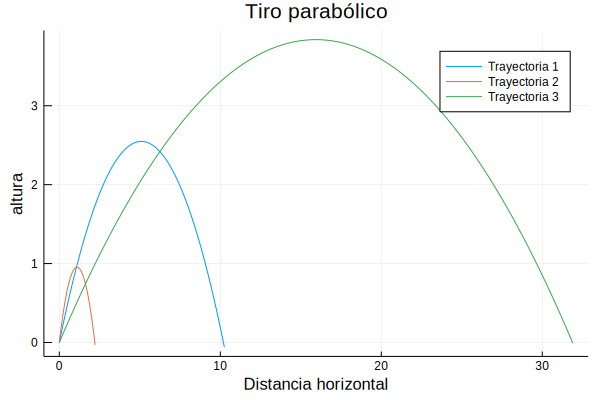

In [37]:
#la función plot hace una gráfica del tipo x vs y de lo que tenga adentro
plot(tiro_parabolico(pi/4,10)[1],tiro_parabolico(pi/4,10)[2],label="Trayectoria 1",title="Tiro parabólico",xlabel="Distancia horizontal",
ylabel="altura")
plot!(tiro_parabolico(pi/3,5)[1],tiro_parabolico(pi/3,5)[2],label="Trayectoria 2",title="Tiro parabólico",xlabel="Distancia horizontal",
ylabel="altura")
plot!(tiro_parabolico(pi/7,20)[1],tiro_parabolico(pi/7,20)[2],label="Trayectoria 3",title="Tiro parabólico",xlabel="Distancia horizontal",
ylabel="altura")
#los invito a jugar con estas gráficas. cambien el ángulo y la rapidez inicial y vean cómo
#esto modifica su tiro parabólico

Vi que muchos me mandaron la tarea en archivos separados. No entendí muy bien por qué 👻, pues pueden trabajar todo en un mismo notebook. Aquí mismo vamos a trabajar el inciso b. Recuerden que pueden agregar bloques de código con el signo más que aparece en la esquina (a un lado del disquete 💾)

In [41]:
ω=1 
r=1
for t = 0:0.1:2*pi
    x=r*cos(ω*t)
    y=r*sin(ω*t)
    v_x=-r*ω*sin(ω*t)
    v_y=r*ω*cos(ω*t)
    println("(",round(x,digits=3), " ", round(y,digits=3),")", "    ", "(",round(v_x,digits=3), " ", round(v_y,digits=3), ")")
end
    

(1.0 0.0)    (-0.0 1.0)
(0.995 0.1)    (-0.1 0.995)
(0.98 0.199)    (-0.199 0.98)
(0.955 0.296)    (-0.296 0.955)
(0.921 0.389)    (-0.389 0.921)
(0.878 0.479)    (-0.479 0.878)
(0.825 0.565)    (-0.565 0.825)
(0.765 0.644)    (-0.644 0.765)
(0.697 0.717)    (-0.717 0.697)
(0.622 0.783)    (-0.783 0.622)
(0.54 0.841)    (-0.841 0.54)
(0.454 0.891)    (-0.891 0.454)
(0.362 0.932)    (-0.932 0.362)
(0.267 0.964)    (-0.964 0.267)
(0.17 0.985)    (-0.985 0.17)
(0.071 0.997)    (-0.997 0.071)
(-0.029 1.0)    (-1.0 -0.029)
(-0.129 0.992)    (-0.992 -0.129)
(-0.227 0.974)    (-0.974 -0.227)
(-0.323 0.946)    (-0.946 -0.323)
(-0.416 0.909)    (-0.909 -0.416)
(-0.505 0.863)    (-0.863 -0.505)
(-0.589 0.808)    (-0.808 -0.589)
(-0.666 0.746)    (-0.746 -0.666)
(-0.737 0.675)    (-0.675 -0.737)
(-0.801 0.598)    (-0.598 -0.801)
(-0.857 0.516)    (-0.516 -0.857)
(-0.904 0.427)    (-0.427 -0.904)
(-0.942 0.335)    (-0.335 -0.942)
(-0.971 0.239)    (-0.239 -0.971)
(-0.99 0.141)    (-0.141 -0.99)
(-

Noten cómo nuestro proyectil empieza en el $(1,0)$ y acaba en el $(1,0)$. Esto quiere decir que dio una vuelta completa.  

Vamos a ver su gráfica. Con suerte, es una circunferencia. Justo como esperamos. 

In [43]:
function MCU(r,ω)
    A=[]
    B=[]
    C=[]
    D=[]
    E=[] 
    for t=0:0.01:6.2830
        x=r*cos(ω*t)
        y=r*sin(ω*t)
        v_x=-r*ω*sin(ω*t)
        v_y=-r*ω*cos(ω*t)
        push!(A,x)
        push!(B,y)
        push!(C,v_x)
        push!(D,v_y)
        push!(E,t)
        #println("(", x,",", y,")")
    end
    return A,B,C,D,E
end

MCU (generic function with 1 method)

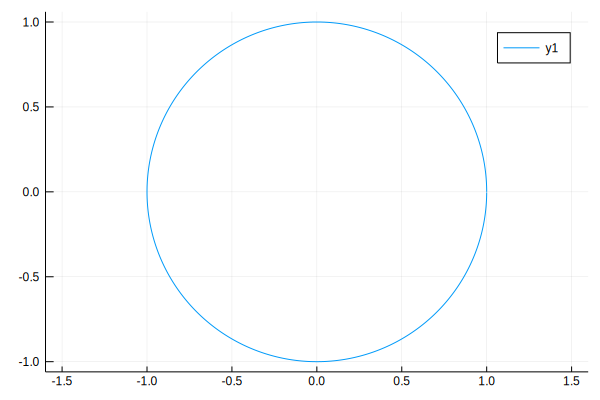

In [44]:
plot(MCU(1,1)[1],MCU(1,1)[2],aspect_ratio=:equal)

Efectivamente fue una circunferencia. Vamos a cambiar los radios y las velocidades angulares a ver qué pasa. Los invito a que ustedes también experimenten. 

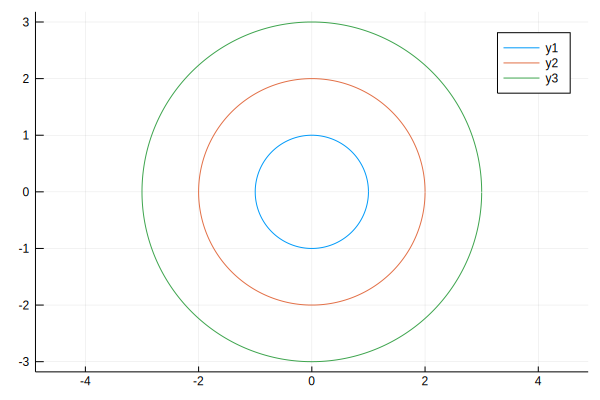

In [46]:
plot(MCU(1,1)[1],MCU(1,1)[2],aspect_ratio=:equal)
plot!(MCU(2,1)[1],MCU(2,1)[2],aspect_ratio=:equal)
plot!(MCU(3,1)[1],MCU(3,1)[2],aspect_ratio=:equal)

Eso sería todo por esta tarea. En algún otro notebook les puedo enseñar cómo hacer animaciones para simular estos movimientos. Gracias por tomarse el tiempo de aprender a usar estas herramientas extra y por su interés en el curso. Les aseguro que todo esto les va a ser muy útil en algún otro momento de la carrera.  

<img src="meme.jpg">